# Multivariable Calculus 

In [28]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt 
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML


import sympy as sym 
from scipy.special import factorial 

from IPython.display import Javascript, HTML, display
%load_ext jsxgraph-magic

The jsxgraph-magic extension is already loaded. To reload it, use:
  %reload_ext jsxgraph-magic


**draft version of notes**
**disclaimer: these notes are very much in their initial stages, typos and erros may be present.**
**notice: you do not have permission to distribute these notes** 

## Multivariate Functions and Partial Derivatives  

### Multivariate Function
A **multivariate function** is a function that takes **two or more variables** as inputs and produces a single output. In general a multivariate function maps from $ \mathbb{R}^n $ to $ \mathbb{R} $:$(f(x_1,~ x_2,~ ...~,~x_{n})$ 

Here are some two examples: 
* **Two-variable function**, $f(x,y) = x^2 + y^2$
* **Three-variable function**, $f(x,y,z)=x + 2y -z $


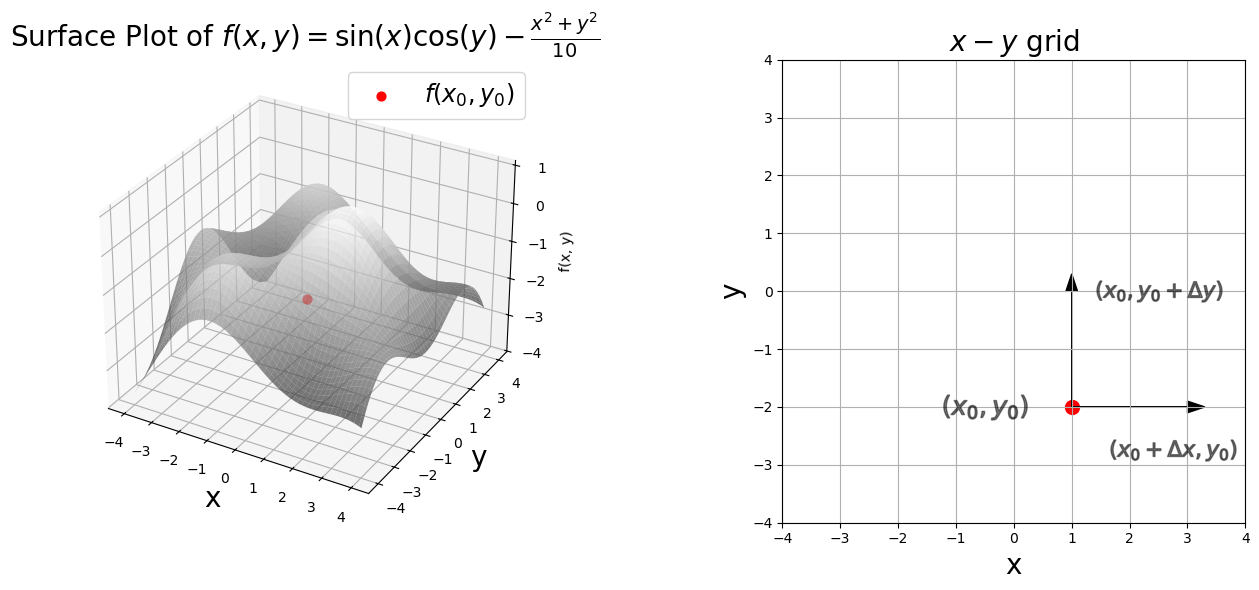

In [29]:
# Define the complex surface function
def f(x, y):
    return np.sin(x) * np.cos(y) + -(x**2 + y**2)/10 

# Create a grid of x and y values
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the 3D surface
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='gray', edgecolor='none', alpha=.7)

x0=1
y0=-2
f0=f(x0,y0)
ax.scatter(x0, y0, f0, color="red", s=40, label=r"$f(x_0, y_0)$")

# Add labels and title
ax.set_title(r'Surface Plot of $f(x, y) = \sin(x)\cos(y) - \frac{x^2 + y^2}{10}$', fontsize=20)
ax.set_xlabel('x', size=20)
ax.set_ylabel('y',size=20)
ax.set_zlabel('f(x, y)')
ax.legend(fontsize="xx-large")

# Plot the grid
ax=fig.add_subplot(122, aspect=True)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
plt.xticks(np.arange(-4, 5, 1))
plt.yticks(np.arange(-4, 5, 1))

# Add a specific point at (x = 2, y = 1)
ax.scatter(x0, y0, color='red', s=100)
ax.arrow(x0, y0, 2, 0, head_width=0.2, head_length=0.3, fc='black', ec='black')
ax.arrow(x0, y0, 0, 2, head_width=0.2, head_length=0.3, fc='black', ec='black')

ax.plot(-.5,-2, marker=r"$(x_0, y_0)$", markersize=60, color="black", alpha=.5)
ax.plot(2.75,-2.75, marker=r"$(x_0+\Delta x, y_0)$", markersize=90, color="black", alpha=.5)
ax.plot(2.5,0, marker=r"$(x_0, y_0 + \Delta y)$", markersize=90, color="black", alpha=.5)


ax.set_title(r"$x-y$ grid", size=20)
ax.set_xlabel("x", size=20)
ax.set_ylabel("y", size=20)
#ax.gca().set_aspect('equal')
ax.grid(True)
plt.tight_layout()


### Partial Derivatives
Above is the plot of the function
\begin{equation} 
f(x, y) = \sin(x)\cos(y) - \frac{x^2 + y^2}{10},
\end{equation} 
an upside-down paraboloid with oscillations, i.e., a lumpy hill. (Scroll up to see the plot.)

Let's take a stroll down imagination lane. Imagine the surface as a hill. The height of the hill above ground level corresponds $f(x,~y)$.  You are a surveyor, currently at position $(x_0,~ y_0)$, the red dot marked on the right plot below (the x-y grid). You record the height at $(x_0,~ y_0)$, let us call this $f_0=f(x_0,~ y_0)$ (this is the red dot on the left panel). You then take a step in the x-direction, $\Delta x$, maintaining your y-position at $y_0$. You measure the height at this location, $f(x_0 + \Delta x, y_0)$. Now you compute the slope from $x_0$ to $x_0 + \Delta x$, 
\begin{equation} 
\text{slope in x-direction} = \frac{f(x_0 + \Delta x, ~y_0) - f(x_0, ~y_0)}{\Delta x}. 
\end{equation} 
You return to your original location at $(x_0,~ y_0)$. You repeat the process but decrease your step $\Delta x$. Your measurement tools enable you to decrease the step $\Delta x$ as much as you like, however small you want to make it (this is imagination lane after all). In the limit as $\Delta x$ goes to zero, you have measured the partial derivative of $f(x,y)$ with respect to $x$ at the point $(x_0,~y_0)$, 

\begin{equation} 
\frac{\partial f}{\partial x} = \lim_{\Delta x \to 0}  \frac{f(x_0 + \Delta x,~ y_0) - f(x_0,~ y_0)}{\Delta x}.
\end{equation} 

Notice that you held the value of $y$ constant at $y_0$.

You return to your original location at $(x_0,~ y_0)$. You repeat the process but take step $\Delta y$ in the y-direction while maintaining your position at $x_0$. You construct a slope in the y-direction, 

\begin{equation} 
\text{slope in y-direction} = \frac{f(x_0 ,~ y_0 + \Delta y) - f(x_0, ~y_0)}{\Delta y}. 
\end{equation} 

You employ your ability to make $\Delta y$ as small as possible. You have measured the partial derivative of f(x,y) with respect to y at the point $(x_0,~y_0)$,

\begin{equation} 
\frac{\partial f}{\partial y} = \lim_{\Delta y \to 0}  \frac{f(x_0 ,~ y_0 + \Delta y) - f(x_0,~ y_0)}{\Delta y}.
\end{equation} 

**Definition**

Given a function $f(x_1, x_2, \dots, x_n)$, the **partial derivative** of $f$ with respect to $x_i$ is the derivative of $f$ treating all other variables $x_j$ ($j \neq i$) as constants, denoted by 

$$
\frac{\partial f}{\partial x_i}.
$$

You can reduce particle derivatives to the single variable case by keeping all but one variable constant. For example, consider the function, $f=f(x_1, x_2, x_3)$. Suppose we keep the last two slots constant, i.e., $x_2$ and $x_3$, and consider the single variable function, $g(t) = f(t, x_1, x_2)$. The partial derivative of $f$ with respect to $x_1$ is the derivative of the single variable function $g(t)$. 
 

**Interpretations**:
* It is the rate of change of $f$ in the direction of the $x_i$ axis, while all other variables are held constant.
* The partial derivative with respect to $x_i$ represents the slope of the function in the direction of the $x_i$-axis, holding all other $x_j$ constant.
  

**Example**

Let $f(x, y) = x^2y + 3xy^2$.

- The **partial derivative with respect to $x$** is found by treating $y$ as a constant:

$$
\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} \left( x^2y + 3xy^2 \right) = 2xy + 3y^2
$$

- The **partial derivative with respect to $y$** is found by treating $x$ as a constant:

$$
\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} \left( x^2y + 3xy^2 \right) = x^2 + 6xy
$$



### Higher Order Partial Derivatives

Partial derivatives can be taken multiple times. For example, the second partial derivative of $f$ with respect to $x$ and $y$ is:

$$
\frac{\partial^2 f}{\partial x \partial y}
$$



### Mixed Partial Derivatives

If the function is smooth enough, mixed partial derivatives are equal. That is, if $f(x, y)$ has continuous second partial derivatives:

$$
\frac{\partial^2 f}{\partial x \partial y} = \frac{\partial^2 f}{\partial y \partial x}
$$

This is known as **[Clairaut's Theorem](https://en.wikipedia.org/wiki/Symmetry_of_second_derivatives)**.


**Back to the initial example**
Let's go back to the initial example, 

\begin{equation} 
f(x, y) = \sin(x)\cos(y) - \frac{x^2 + y^2}{10}.
\end{equation} 

I could write out the partial derivatives here, well, "to heck with that", I will just use SymPy. See the code below. I will let you to check if SymPy is correct.

In [30]:
x, y = sym.symbols("x y") 
f=sym.sin(x)*sym.cos(y) - (x**2 +y**2)/10 

In [31]:
# partial derivative with respect to x
f.diff(x) 

-x/5 + cos(x)*cos(y)

In [32]:
# partial derivative with respect to y
f.diff(y) 

-y/5 - sin(x)*sin(y)

In [33]:
# second partial derivative with respect to x
f.diff(x,2) 

-(sin(x)*cos(y) + 1/5)

In [34]:
# second partial derivative with respect to y
f.diff(y,2)

-(sin(x)*cos(y) + 1/5)

In [35]:
# second partial derivative with respect to x and y, f_{x,y}, method 1
sym.diff(f,x,y)

-sin(y)*cos(x)

In [10]:
# second partial derivative with respect to x and y, f_{x,y}, method 2
f.diff(x,y)

-sin(y)*cos(x)

In [11]:
# second partial derivative with respect to x and y, f_{x,y}, method 3
f.diff(x,y)
f.diff(x).diff(y)

-sin(y)*cos(x)

## The Gradient 

The **gradient** of a scalar function $f(x_1,x_2,...,x_n)$ is a vector that contains all the  partial derivatives of $f$ with respect to $x_1,x_2,...,x_n$,

\begin{equation}
\nabla f(x_1, x_2, ..., x_n) = \begin{bmatrix}\frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}.
\end{equation}

The symbol for the gradient is called the nabla or dell operator $\nabla$ (the upside down triangle). 

For a function of two variables:  
\begin{equation}
f(x, y)
\end{equation}

The gradient is:  
\begin{equation}
\nabla f(x, y) = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} 
\end{equation}

Back to imagination lane. Recall you are a surveyor, measuring the change in height of a hill; think of $f(x,~y)$ as the height map. The partial derivative in the x-direction measures the rate of change of height as you move in the x-direction. The partial derivative in the y-direction measures the rate of change of height as you move in the y-direction. 

You ask yourself a question, "In which direction should I walk so that the path I take is the steepest?" (Ignoring the fact that no one would want to take the steepest path, again, it's imagination lane here). Now you don't have to walk in either the x or y directions, you can choose a path in any direction. The direction you should choose is the direction of the gradient.

- The gradient points in the direction of the **steepest rate of increase** of the function (often called the direction of steepest ascent) 
- The gradient tells us **how the function changes** in each direction at a given point.
- It is **perpendicular to level curves** (contour lines) of the function.


**Optimization and the Gradient** 

In optimization, we don't want to move in the direction that the function (i.e. the loss function) increases most rapidly. We want to move in the direction of the most rapid decrease, as we are trying to get to the minima of the loss function ("what I call the bottom of things"). This means we should move in the direction of the negative of the gradient. We can write the optimiation rule as 

\begin{equation} \text{new location = current location - the gradient of the loss function.}
\end{equation} 

Gradient descent is one of the most common optimization algorithms. The gradient desent rule looks like this
\begin{equation} 
\mathbf{x}_{n+1} = \mathbf{x}_n - \eta \nabla L,
\end{equation}
where $L$ is the loss function, $\mathbf{x}_n$ are the function paramters at step $n$, likewise, $\mathbf{x}_{n+1}$ are the function parameters at step $n+1$, and $\eta$ is called the learning rate, which controls how large of a step to take. 

**Example of a Gradient**

Let:  
\begin{equation}
f(x, y) = x^2y + \sin(xy)
\end{equation}

Then:  
\begin{equation}
\frac{\partial f}{\partial x} = 2xy + y\cos(xy)
\end{equation}  
\begin{equation}
\frac{\partial f}{\partial y} = x^2 + x\cos(xy)
\end{equation}

So the gradient is:  
\begin{equation}
\nabla f(x, y) = \begin{bmatrix} 2xy + y\cos(xy) \\\ x^2 + x\cos(xy) \end{bmatrix} 
\end{equation}

Here is the above example in SymPy. 

In [20]:
x, y = sym.symbols("x y") 
f =  x**2*y + sym.sin(x*y)

df = sym.Matrix([f.diff(val) for val in (x,y)])
df

Matrix([
[2*x*y + y*cos(x*y)],
[ x**2 + x*cos(x*y)]])

## The Jacobian 
For a function $f : \mathbb{R}^n \to \mathbb{R}^m$, the Jacobian is defined as
\begin{equation} 
J_f =
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}.
\end{equation}

The elements in index notation for the Jacobian are
\begin{equation} 
[J_f]_{ij} = \frac{\partial f_i}{\partial x_j}.
\end{equation} 

The i-th row of the Jacobian is the gradient of $f_i$. 

**Example**
Consider the vector valued function 
\begin{equation} 
\mathbf{f}(x,y) = \begin{bmatrix} x^2 + y^2 \\ x^2 + xy \end{bmatrix} .
\end{equation} 

The Jacobian is 
\begin{equation} 
J_f = \begin{bmatrix} 2x & 2y \\
2x + y & x 
\end{bmatrix} 
\end{equation} 

Here is the above example in SymPy.

In [21]:
x, y = sym.symbols('x y')

# Define a vector-valued function (e.g., f(x, y) = [x^2 * y, sin(x + y)])
f1 = x**2  + y**2
f2 = x**2 + x*y 

# Create the vector-valued function
f = sym.Matrix([f1, f2])

# Compute the Jacobian matrix
jacobian_matrix = f.jacobian([x, y])

f

Matrix([
[x**2 + y**2],
[ x**2 + x*y]])

In [22]:
jacobian_matrix

Matrix([
[    2*x, 2*y],
[2*x + y,   x]])

## Hessian 
The **Hessian matrix** is a square matrix of second-order partial derivatives of a scalar function. Given a twice-differentiable function $( f: \mathbb{R}^n \to \mathbb{R} )$, the Hessian matrix $H$ is defined as:


\begin{equation}
H_f=
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
\end{equation} 

\begin{equation} 
[H_f]_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j}
\end{equation} 


When we considered functions of a single variable, we learned that the second derivative contained information about the curvature of the curve. Likewise, the Hessian contains information about the local curvature of the multivariate function. 

**Example**
\begin{equation} 
f(x, y) = x^3 + y^2 + xy
\end{equation} 

Computing second-order derivatives:

\begin{equation} 
\frac{\partial^2 f}{\partial x^2} = \frac{\partial}{\partial x} (3x^2 + y) = 6x
\end{equation} 

\begin{equation} 
\frac{\partial^2 f}{\partial y^2} = \frac{\partial}{\partial y} (2y + x) = 2
\end{equation} 

\begin{equation} 
\frac{\partial^2 f}{\partial x \partial y} = \frac{\partial}{\partial y} (3x^2 + y) = 1
\end{equation} 

\begin{equation} 
\frac{\partial^2 f}{\partial y \partial x} = \frac{\partial}{\partial x} (2y + x) = 1
\end{equation} 

\begin{equation} 
H_f= \begin{bmatrix} 6x & 1 \\
1 & 2 \end{bmatrix} 
\end{equation} 

Here is the SymPy code for the example above. 

In [23]:
# Define the variables
x, y = sym.symbols('x y')

# Define a scalar-valued function (e.g., f(x, y) = x^2 + y^2)
f = x**3 + y**2 + x*y

# Compute the Hessian matrix
hessian_matrix = sym.hessian(f, [x, y])
hessian_matrix 

Matrix([
[6*x, 1],
[  1, 2]])

## The Chain Rule

The chain rule is used to compute the derivative of composite functions.

For a composite function $f=f(g(x))$ the chain rule provides the derivative:
\begin{equation} 
\frac{df}{dx} = \frac{d f}{d g}\frac{d g}{d x}. 
\end{equation} 

**Example**
Let us consider a composite operation composed of a linear transformation of input data $x$ followed by a non-linear transformation,  
\begin{equation} 
\begin{split} 
& z = \beta_0 + \beta_1 x , \quad \text{linear transformation of $x$} \\
& y  = \sigma(z)  , \quad \text{non linear transformation of $z$} \\
& \sigma(z) = \frac{1}{1 + e^{-z}} 
\end{split} 
\end{equation} 
where $y$ is the output data and $\sigma$ is called the sigmoid function. 

We want the partial derivatives of $y$ with respect to the model parameters $\beta_0$ and $\beta_1$: 

\begin{equation} 
\begin{split} 
& \frac{\partial y}{\partial \beta_0} = \frac{\partial \sigma}{\partial z} \frac{\partial z}{\partial \beta_0} \\
& \frac{\partial y}{\partial \beta_1} = \frac{\partial \sigma}{\partial z} \frac{\partial z}{\partial \beta_1} . 
\end{split} 
\end{equation} 

We compute each term individually. 

\begin{equation}
\begin{split} 
& \frac{\partial \sigma}{\partial z} = \frac{e^{-z}}{(1 + e^{-z})^2} \\
& \frac{\partial z}{\partial \beta_0} = 1 \\
& \frac{\partial z}{\partial \beta_1} =1 .
\end{split} 
\end{equation}

We now have: 
\begin{equation} 
\begin{split} 
& \frac{\partial y}{\partial \beta_0} = \frac{e^{-\beta_0 - \beta_1 x}}{(1 + e^{-\beta_0 - \beta_1 x})^2}  \\
& \frac{\partial y}{\partial \beta_1} = \frac{xe^{-\beta_0 - \beta_1 x}}{(1 + e^{-\beta_0 - \beta_1 x})^2} .  
\end{split} 
\end{equation} 

Below, I checked the result in SymPy. 

In [24]:
x,z,beta_1, beta_0 = sym.symbols("x z beta_1 beta_0") 

z=beta_0 + beta_1 *x 
z

beta_0 + beta_1*x

In [25]:
y = 1/(1 + sym.exp(-z)) 
y 

1/(exp(-beta_0 - beta_1*x) + 1)

In [26]:
y.diff(beta_0) 

exp(-beta_0 - beta_1*x)/(exp(-beta_0 - beta_1*x) + 1)**2

In [27]:
y.diff(beta_1) 

x*exp(-beta_0 - beta_1*x)/(exp(-beta_0 - beta_1*x) + 1)**2

## Multivariable Taylor Series

A multivariable function has a Taylor series given by, 
\begin{equation} 
f(\mathbf{x} + \mathbf{\Delta x}) = f(\mathbf{x}) + \nabla f(\mathbf{x}) \cdot \mathbf{\Delta x} + \frac{1}{2} \mathbf{\Delta x}^T H_f(\mathbf{x}) \mathbf{\Delta x} + \cdots.
\end{equation} 


Explanation:

$\mathbf{x} = \left[ x_1, x_2, ..., x_n\right]^T$:  A vector representing the point at which the Taylor series is expanded. 

$\mathbf{\Delta x}= \left[\Delta x_1, \Delta x_2, ..., \Delta x_n\right]^T$: A vector representing the displacement from $\mathbf{x}$.

$f(\mathbf{x})$: The value of the function at $\mathbf{x}$.

$\nabla f(\mathbf{x})$: The gradient of f at $\mathbf{x}$, which is a vector of the first partial derivatives.

$\nabla f(\mathbf{x}) \cdot \mathbf{\Delta x}$: The dot product of the gradient and the displacement vector.

$H_f(\mathbf{x})$: The Hessian matrix of f at $\mathbf{x}$, which is a matrix of the second partial derivatives.

$\mathbf{\Delta x}^T$: The transpose of the displacement vector.

$\frac{1}{2} \mathbf{\Delta x}^T H_f(\mathbf{x}) \mathbf{\Delta x}$: A quadratic form involving the Hessian and the displacement vector.

$\cdots$: Represents higher-order terms in the expansion.